"""
references:
    Karpathy, A. 2022. The spelled-out intro to neural networks and backpropagation: building micrograd. https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ
"""

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
scalar valued function
input = x
ouput = y
where x AND y are scalar values
'''
def f(x):
    return 3*x**2 - 4*x + 5 # 3x² - 4x + 5

In [3]:
f(3.0)

20.0

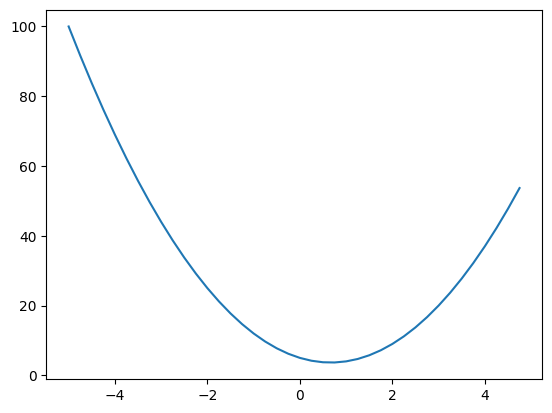

In [4]:
x_scalar_values = np.arange(-5, 5, 0.25)
y_scalar_values = f(x_scalar_values)
plt.plot(x_scalar_values, y_scalar_values)

In [5]:
# what is the derivative of this function(f(x)) at any input value x

# slope at 3
h = 0.00000001
x = 3.0
how_much_the_function_responded = f(x + h) - f(x)
'''
    normalize by run
        = rise/run
'''
slope = how_much_the_function_responded/h
slope # numerial approximation. requires h to be very small to get the actual scope

14.00000009255109

In [6]:
# slope at -3
h = 0.00000001
x = -3.0
how_much_the_function_responded = f(x + h) - f(x)
slope = how_much_the_function_responded / h
slope

-22.00000039920269

In [7]:
# slope at 2/3
# i.e. the function does not respond
h = 0.00000001
x = 2/3
how_much_the_function_responded = f(x + h) - f(x)
slope = how_much_the_function_responded / h
slope 
'''
    slope = 0 i.e the function does not respond
    stay almost the same?
'''

'\n    slope = 0 i.e the function does not respond\n    stay almost the same?\n'

In [4]:
# another function scalar function
# from 3 scalars to 1 scalar
a = 2.0
b = -3.0
c = 10.0
def f(a, b, c):
    return a * b + c

d = f(a, b, c)
d

4.0

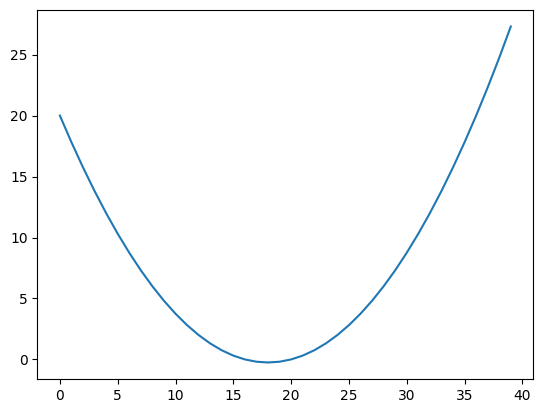

In [9]:
a_values = np.arange(-5, 5, 0.25)
b_values = np.arange(-5, 5, 0.25)
c_values = np.arange(-5, 5, 0.25)
d_values = f(a_values, b_values, c_values)
plt.plot(d_values)

In [3]:
h = 0.00000001
a = 2.0
b = -3.0
c = 10.0

d1 = f(a, b, c)
d2 = f(a + h, b, c)
print('d1 = ', d1)
print('d2 = ', d2)
print('slope = ', (d2 - d1)/h)


NameError: name 'f' is not defined

In [3]:
class Value():
    def __init__(self, data, _construction_parameters=(), _operation=""):
        """
            _construction_parameters: Values used to create this Value
            _operation: operation that created this Value
        """
        self.data = data
        self.previous = set(_construction_parameters)
        self.operation = _operation
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), "+")

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), "*")

In [4]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a*b + c
d

d.previous
d.operation
d

Value(data=4.0)

In [8]:
def build_graph(root: Value):
    """
        build set of nodes(vertices) and edges
    """
    nodes, edges = set(), set()
    def build(node):
        if node not in nodes:
            nodes.add(node)
            for child in node.previous:
                edges.add((child, node))
                build(child)
    build(root)
    return nodes, edges